# Credit Card Fraud Detection using Self-Organzied Map

### **Objective :**
* Suppose we are Deep Learning Scientists working at a bank and we are given a datatset regarding th customers of this bank who are applying for an advanced Credit Card
* This data would be info that a customer provies while applying for the card
* And our job is to detect potential frauds among these applications
* In the end we should be able to give a list to the Manager of the customers who cheated on their application

### **Approach :**
* Unlike the Machine Learning Models, where we predict whether each customer might be a potential fradulent by already training our machine based on previously labelled fraudster as YES or NO, here our approach would be to not consider the dependent variable and plot a map which shows us what a fraudster would look like
* We will use an **Unsupervised Deep Learning Algorithm** called **Self-Organzing Map**, which means we will be identifying patterns in high dimensional datasets full of non linear relationships and one of these patterns(in this case the customers) will be the potential frauds or the customers who cheated
* In more simple terms I will be doing Customer Segmentation to identify segments of customers and one of the segments will contain the customers who cheated

### Goals of this project :
* Understanding the idealogy of Self Organizing Map
* Implementing concepts like - Winning Node, Dimensionality Reduction, Mean Inter-neuron Distance 
* Interpreting outliers in the SOM 
* Understanding the need of Normalization
* Interpreting the SOM in detail and making it more interactive by mapping the info from the dataset
* Inverse mapping, inverse scaling and getting the list of potential fraudsters

### **DataSet Information :**
* This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data
* This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values
* The dataset consists of 14 feature variables and 1 class label that quantifies the approval decision. Not much is known about the 14 features themselves for the sake of confidentiality and for convenience of processing statistical algorithms
* This means that even the feature names are not present, but whether they are continuous or categorical is known

**Variables :**

    * A1: 0,1 CATEGORICAL (formerly: a,b)
    * A2: continuous.
    * A3: continuous.
    * A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)
    * A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
    * A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)
    * A7: continuous.
    * A8: 1, 0 CATEGORICAL (formerly: t, f)
    * A9: 1, 0 CATEGORICAL (formerly: t, f)
    * A10: continuous.
    * A11: 1, 0 CATEGORICAL (formerly t, f)
    * A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)
    * A13: continuous.
    * A14: continuous.
    * A15: 1,2 class attribute (formerly: +,-)
    

### Step - 1 :
* Importing the Libraries and the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

data = pd.read_csv('C:/Users/Rohit/Desktop/Data Science/Deep Learning/Datasets/Credit_Card_Applications.csv')

## Idealogoy of the SOM :
* Every customer is an input to the neural network and these points are going to be mapped to a new output space
* In between this input and output space, we have a neural network composed of neurons
* Each neuron is being initialized as a vector of weights that is the same size as of the vector of customers, i.e a vector of 15 elements(columns in dataset)
* Hence for each one of these obseravtion point(customer), the output of this customer will be the neuron closest to the customer
* In short we pick the neuron in the network closest to the customer and this neuron is called the **Winning Node (WN)** or **Best Matching Unit (BMU)**
* For each customer the WN is the most similar neuron to the customer
* Then we use different functions to update the weights of the winning node to move them closer to the actual points 
* This is done for every customer and then we repeat this agin and again
* Hence this reduces the dimensions every time we iterate through the data again and again
* Hence the Self-Organzied Map is used for **Dimensionality Reduction**
* Each time this is repeated the output space decreases and loses dimensions
* After this we get a SOM in 2D with all the WNs that were eventually identified and in turn we get closer towards identifying frauds

**How to detect frauds?**
* Frauds would be nothing but the outliers in our SOM, i.e something far from the general rule
* Hence the outlying neurons would be considered as the outliers in this 2D SOM

**What do we need?**
* We need something called as **Mean Inter-neuron Distance (MID)**
* For each neuron in the network we are going to compute the mean Euclidean Distance between a nueron and the neurons in its repsective neighbourhood and by doing this, we can detect outliers
* Because the outliers will be far from all the neurons in its neighbourhood
* This neighbourhood needs to be defined manually
* All of this info will be mapped on the SOM to detect frauds (outliers)

**How to conclude?**
* In the end we will use an invserse mapping function to identify which customers orignally in the input space are associated to this WN, which is an outlier



In [2]:
# checking the head
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


* We can see that the data is already labelled by the `Class` variable as `0`(application rejected) and `1`(application approved)
* Hence we need to get rid of this column in order to achieve the goal of performing Unsupervised Deep Learning
* On the SOM we would be able to distinguish who got approval and who didn't as we can know by prioritizing who cheated and yet got the approval

### Step - 2 :
**Creating the subset of the independent and dependent variable**

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values  # although the dependent variable is stored here, we won't be using it in the model

### Step - 3 :
**Feature Scaling : Normalization**
* There are high computations required and the data has many dimensions with lots of non linear relationships
* Thus we scale the data to crush the impact of variable with larger weight in the analysis
* This method equalizes range and variability in the dataset

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

### Step - 3 :
* Using a class MiniSom

In [5]:
# pip install minisom
from minisom import MiniSom

### Step - 3.1 :
* Training the SOM on Data not having the dependent variable, in this case `X`

In [6]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

**Arguments used :**
* `x` and `y` are the dimensions of the grid of our map
* `sigma` is the radius of different neigbourhoods in the grid
* `learning_rate` decides how much the weights are updated during each iteration

### Step - 3.2 :
* Initializing the weights

In [7]:
som.random_weights_init(X)

### Step - 3.3 :
* Training the SOM on X 

In [8]:
som.train_random(data=X, num_iteration=100)

**Argument used :**
* `num_iteration` is the no. of times we want to repeat the process discussed above

### Step - 4 :
* Visualizing the results to identify the outlying neurons inside the map

**What to look for in SOM?**
* We will be seeing a 2D grid that will contain all the final WNs and for each of these WNs we will get the MID (Mean Inter-neuron Distance)
* Higher the MID, then more the WN is far away from its neighbours
* Hence, higher the MID, the more it is an outlier
* Since majority of the WNs represent the rules that are respected, while an outlying nueron from this majority of neurons is therefore far from the general rules
* This is how we detect the fraud (outliers), i.e considering the WNs having the highest MID
* All of this will be distinguished by colors and not values, i.e the closer the color will be to white if the WN has a higher MID


In [9]:
# the library used for this specific purpose is 'pylab'
from pylab import bone, pcolor, colorbar, plot, show

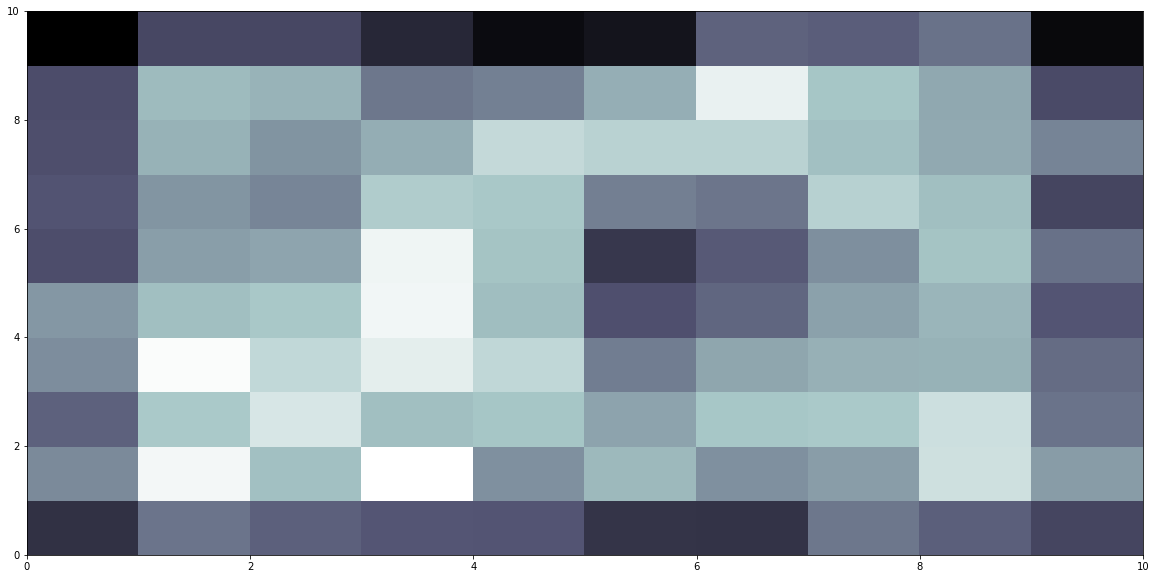

In [10]:
plt.figure(figsize = (20,10))
# Step 4.1 - initializing the figure (the window having the map)
bone()

# Step 4.2 - putting different WNs on the map 
# this is done by using different colors corresponding to the different range of values of the MIDs
# i.e we add the info of the MIDs for all the WNs that the SOM identified 
# done by the distance_map() method which returns the matrix of all the MIDs in it for all the WNs
pcolor(som.distance_map().T)  # .T means taking transpose of this matrix to get the values in order for this function

* So what we did here is created the SOM with all different colors corresponding to the MIDs
* But we need to see if white color corresponds to a higher or lower MID and same for the dark colors
* Hence we add a legend

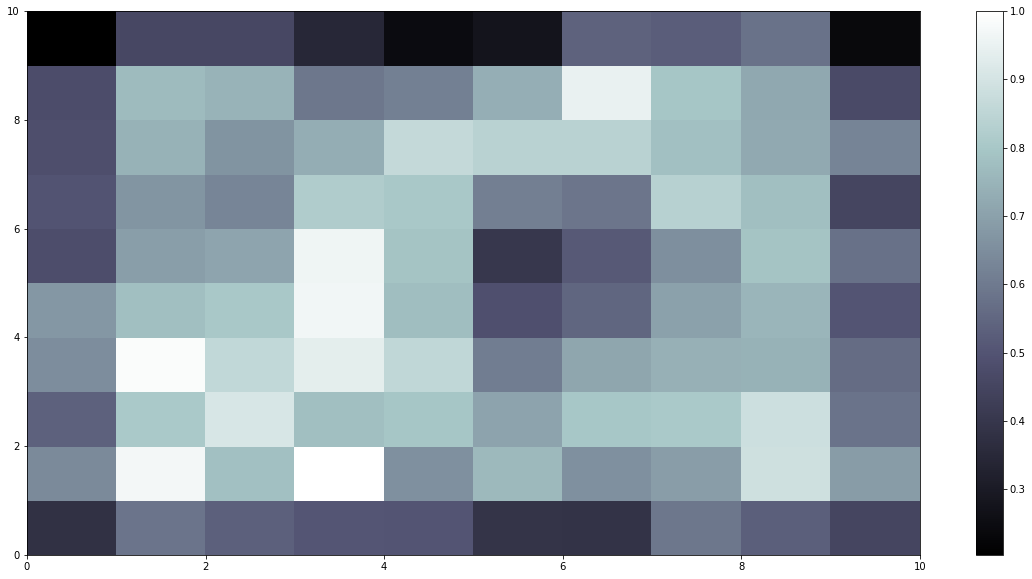

In [11]:
# we need to run all the lines corresponding to the visualization together hence we write the lines again
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()  # legend

* Hence we can conclude that highest MID is white color and lowest one is represented by dark color
* We get a range of values from 0 to 1 as we normalized the data
* Thus the outlying WNs/outliers/frauds, which are far from the general rules are represented by white
* We can also see a majority of WNs having high MIDs are close to each other
* To conclude we can say that the WNs with the highest MIDs are the fraud applications

### Step - 5 :
* Now we need to create a list of customers by inverse maping the WNs to see which customers are associated to the WNs indicating the fraud application
* We can also put markers to see which customers got approval and which didn't
* **Because the customer who cheated and yet got approval are more relevant target to fraud detection than the ones who cheated cheat and didn't get approval**
* Let's see where the customers are on the SOM

**Understanding the for loop below :**
* `i` is the index of all customers and `j` is the vector of customers at diff. iterations
* Then we get the winning node for every customer
* Then we place the color marker for the specific WN at the centre of the square
* Then we decide where we need to put a red circle or a green square by knowing whether that specific customer got the approval or not
* And we do this by taking help of the 'dependent variable vector' we seperated above which has the actual values 
* Then we associate it with markers and colors we defined above

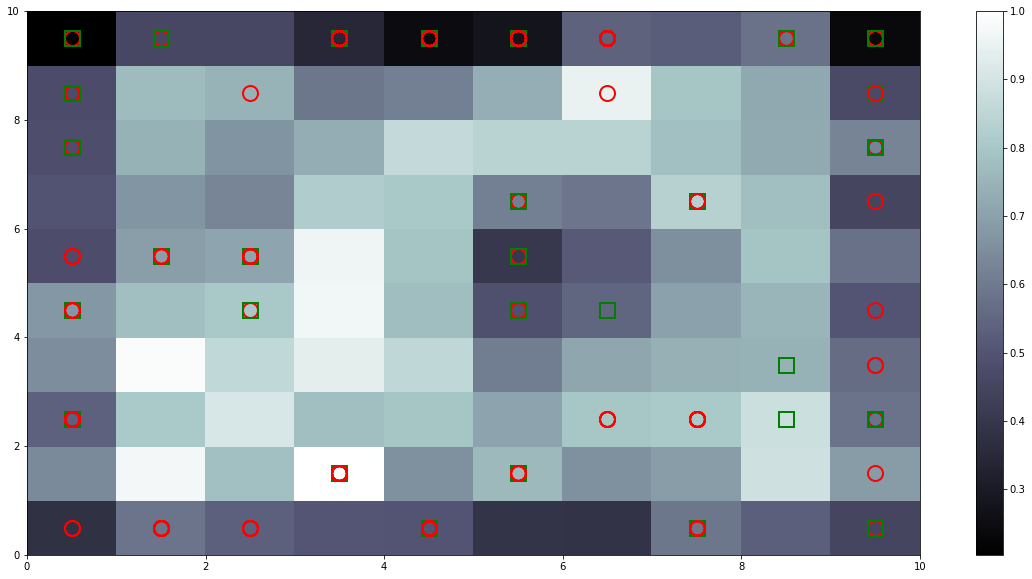

In [12]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar() 

# 'red circle' marker will represent customer who didn't get approval and 'green square' marker will represnt who did
markers = ['o', 's']
colors = ['red', 'green']

# creating the loop to apply the logic above
for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize=15,
                markeredgewidth = 2)  
    
show()

**Take aways from the SOM above :**
* Now we not only have the MIDs, but also we plotted the customers who got approval and the ones who didn't for each of the WN
* Now if you observe at the white WN in the lower left section which didn't get approval, we can see that the customers associated to that WN didn't get approval either
* This also indicates that there is a high risk of fraud for the customers associated to that particular WN

**Note :**
* We also see some cheaters who got approval and got away with it (the highest MID having both the markers in it) at the co-ordinate(x=3, y=1) - check from the lower left corner
* Hence there is a need to catch this potential cheaters in the WNs

### Step - 6 :
* Making a list of the cheaters by mapping
* We use the method win_map that returns the dictionary of all the mappings from the WNs to the customers


In [13]:
mappings = som.win_map(X) 

**How does this work?**
* We get a key, in this case let's say (0,0) i.e the co-ordinates for lower left WN in SOM (the 1st WN in the SOM)
* Then we get the list of all the customers asociated to that specific WN

### Step - 7
**Catching the Cheaters :**
* The outlying winning node we recognized from the map was at the position (3,1)

In [18]:
frauds = mappings[(3,1)]

* **Here we get a list of all the customers associated to this WN, i.e all the cheaters**
* The values are scaled hence its hard to recognize them


**Inverse scaling the scaled values**

In [19]:
frauds = sc.inverse_transform(frauds)
df_frauds = pd.DataFrame(frauds)

In [20]:
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15662854.0,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
1,15610042.0,0.0,20.42,10.500,1.0,14.0,8.0,0.000,0.0,0.0,0.0,1.0,2.0,154.0,33.0
2,15568162.0,0.0,19.50,0.165,2.0,11.0,4.0,0.040,0.0,0.0,0.0,1.0,2.0,380.0,1.0
3,15745375.0,0.0,33.08,1.625,2.0,2.0,4.0,0.540,0.0,0.0,0.0,1.0,2.0,0.0,1.0
4,15638983.0,0.0,56.83,4.250,1.0,1.0,1.0,5.000,0.0,0.0,0.0,1.0,2.0,0.0,5.0
5,15654625.0,0.0,53.33,0.165,2.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,1.0,62.0,28.0
6,15662152.0,0.0,29.75,0.665,2.0,9.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,300.0,1.0
7,15623210.0,0.0,26.58,2.540,1.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,2.0,180.0,61.0
8,15734578.0,0.0,21.75,11.750,2.0,8.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,180.0,1.0
9,15570508.0,0.0,51.92,6.500,2.0,3.0,5.0,3.085,0.0,0.0,0.0,1.0,2.0,73.0,1.0


### Conclusion :
* We got the Customer IDs of the cheaters/fraudsters and a list of 25 such people
* The bank's analyst will investigate the list
* What this analyst will probably do is get the actual values of all the cheaters
* He/She will prioritize the cheaters that are approved to revise the appication and then further investigate how did the customer managed to cheat